<a href="https://colab.research.google.com/github/alaaessam4/Tweets-Trending-Topics-Classification-over-Time/blob/main/Copy_of_NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP Project: Sentiment Analysis For Tweets**
###**Dataset** 
* Twitter Dataset for Sentiment Analysis from Kaggle: https://www.kaggle.com/datasets/kazanova/sentiment140

###**Table of Contents**
*   Liberaries
*   Data Exploration
*   Text Preprocessing
*   Train Test Split




## Liberaries

In [ ]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
%matplotlib inline

import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/ColabNotebooks')
%cd /ColabNotebooks

Mounted at /ColabNotebooks
/ColabNotebooks


## Data Exploration

In [ ]:
#Read data set and show the first 15 rows
df=pd.read_csv('My Drive/ColabNotebooks/TweetSentiment.csv',encoding = "ISO-8859-1" ,names=["NumLabel", "number","Date", "query", "username","Caption"])
pd.set_option('max_colwidth', None)
df.head(15)

,NumLabel,number,Date,query,username,Caption
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?"
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [ ]:
df.drop(['number','query'], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   NumLabel  1600000 non-null  int64 
 1   Date      1600000 non-null  object
 2   username  1600000 non-null  object
 3   Caption   1600000 non-null  object
dtypes: int64(1), object(3)
memory usage: 48.8+ MB


In [ ]:
#Representing each class with number instead of string

df['NumLabel'] = df['NumLabel'].replace({0:-1, 2:0, 4:1})
df['LABEL'] = df['NumLabel'].replace({-1:'negative', 0:'neutral', 1:'positive'})

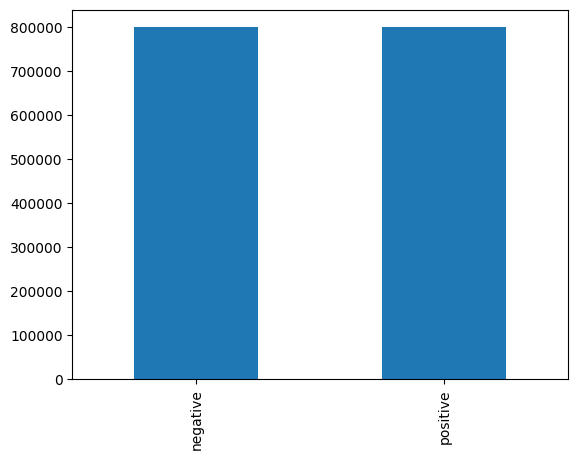

In [ ]:
df['LABEL'].value_counts().plot(kind='bar');

In [ ]:
#Number of Samples
df.shape[0]

1600000

In [ ]:
#Number of Samples in each class
df['LABEL'].value_counts()

negative    800000
positive    800000
Name: LABEL, dtype: int64

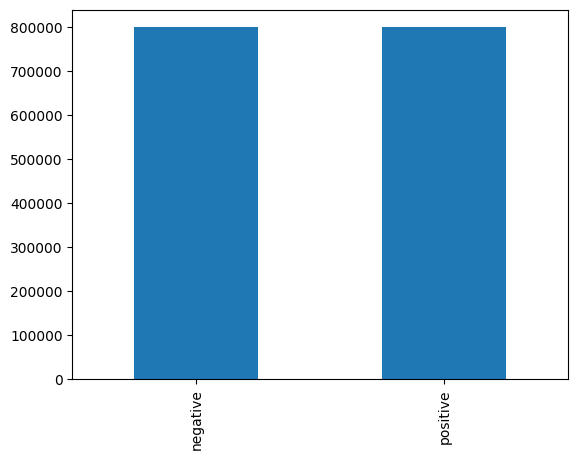

In [ ]:
df['LABEL'].value_counts().plot(kind='bar');

Max tweet length = 374 
Min tweet length = 6


Text(0, 0.5, 'No. of Tweets')

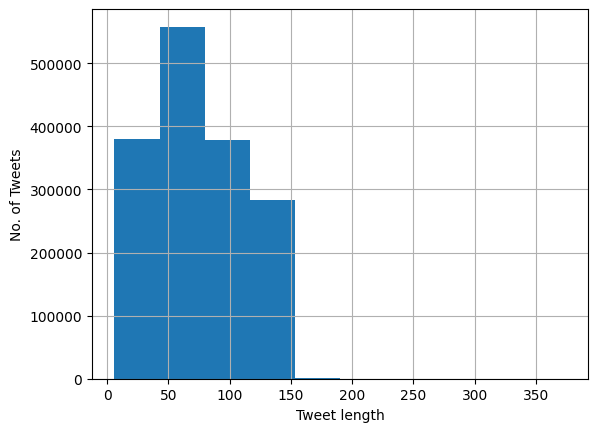

In [ ]:
#Number of Tweets words Visualization

print("Max tweet length =",df['Caption'].str.len().max(),"\nMin tweet length =",df['Caption'].str.len().min())
fig = df['Caption'].str.len().hist()

fig.set_xlabel("Tweet length")
fig.set_ylabel("No. of Tweets")

In [ ]:
df['hashtag'] = df['Caption'].apply(lambda x: re.findall(r"#(\w+)", x))
df['number_of_hashtags']  = df['hashtag'].str.len()

In [ ]:
# Groupby by Label
Label = df.groupby("LABEL")

# Summary statistic 
Label['number_of_hashtags'].describe()

,count,mean,std,min,25%,50%,75%,max
LABEL,,,,,,,,
negative,800000.0,0.022966,0.193278,0.0,0.0,0.0,0.0,24.0
positive,800000.0,0.032118,0.251199,0.0,0.0,0.0,0.0,15.0


In [ ]:
def get_common_words(label_num): 
  y = df[df['NumLabel'] == label_num]["Caption"].apply(lambda x: apply_processing(x )).tolist()
  words = list(set([a for b in y for a in b]))
  #Frequency of words
  fdist = FreqDist(words)
  #WordCloud
  wc = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(fdist)
  plt.figure(figsize=(12,10))
  plt.imshow(wc, interpolation="bilinear")
  plt.axis("off")
  plt.show()

---------------

## Text Preprocessing

In [ ]:
#Remove mentions from the tweet
def remove_mentions(text):
  return " ".join(filter(lambda x:x[0]!='@', text.split()))

#Remove digits from the tweet
def remove_digits(text):
  return ''.join([i for i in text if not i.isdigit()])

#Remove Punctuations convert it into lowercase
def remove_punctuations(text):
  return re.sub(r'[^\w\s]', '', (text)).lower()

#Lemmatization + tokenization
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = TweetTokenizer()
def lemmatize_text(text):
 return [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize((text))]

#Remove Stop Words
stop_words = set(stopwords.words('english'))
def remove_stopwords(text_lest):
  filtered_sentence = []   
  for w in text_lest:
      if w not in stop_words:
          filtered_sentence.append(w)
  return filtered_sentence

def remove_non_alphanumeric(text):
    return re.sub("[^a-z0-9]"," ", text)

def remove_links(text):
  text = re.sub(r"http\S+", "", text)
  text = re.sub(r"www.\S+", "", text)
  return text;

In [ ]:
#Apply stemming to check if it improves the accuracy
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def stem_text(text_lest):
  filtered_sentence = []   
  for w in text_lest:
          filtered_sentence.append(ps.stem(w))
  return filtered_sentence

In [ ]:
#Apply the preprocessing on text
def apply_processing(text):
  text = remove_punctuations(remove_mentions(remove_links(text)))
  text = remove_non_alphanumeric(text)
  text = remove_stopwords(lemmatize_text(text))
  "".join(text);
  return text

----------------------

## Train Test Split

In [ ]:
sentences = df['Caption'].values
y = df['NumLabel'].values

sentences_train,sentences_test,y_train,y_test = train_test_split( sentences, y, test_size=0.25,  random_state=1000)

In [ ]:
X_train = [(apply_processing(tweet)) for tweet in sentences_train]
X_test = [(apply_processing(tweet)) for tweet in sentences_test]

In [ ]:
X_train

[[],
 ['sound', 'like', 'liking', 'jersey', 'little', 'much'],
 ['met', 'guy', 'gave', 'number', 'get', 'wait', 'see', 'callsi', 'think'],
 ['finished', 'film', 'even', 'better', 'second', 'time'],
 ['sent',
  'message',
  'im',
  'sure',
  'read',
  'sorry',
  'message',
  'sent',
  'asking',
  'fillin',
  'wa',
  'selfish'],
 ['soo', 'cute'],
 ['please',
  'follow',
  '5',
  'sitting',
  'watching',
  'skit',
  'hulu',
  'thank',
  'justin'],
 ['glad',
  'could',
  'help',
  'best',
  'part',
  'though',
  'magazine',
  'cover',
  'fed'],
 ['lukin', 'foward', 'exam', 'done'],
 ['nothing', 'today'],
 ['im', 'goin', 'bed', 'since', 'dad', 'yelled', 'get', 'bed', 'hour', 'ago'],
 ['thanks', 'refollow', 'maarten'],
 ['im', 'glad', 'hear', 'im', 'one', 'awake', '2', 'morning'],
 ['go',
  'resource',
  'fair',
  'last',
  'night',
  'lost',
  'great',
  'info',
  'didnt',
  'really',
  'went'],
 ['im',
  'getting',
  'goosebump',
  'nowi',
  'still',
  '2',
  'exam',
  'gobt',
  'wish',
  

-------------------------

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 90.9 MB/s eta 0:00:00


In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
# load model and tokenizer
roberta = "cardiffnlp/twitter-roberta-base-sentiment"

model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

labels = ['Negative','Neutral', 'Positive']

In [ ]:
df['new2'] = df.apply(lambda df: tokenizer(df['Caption'], return_tensors='pt'), axis=1)

In [ ]:
from numpy import savez_compressed
savez_compressed('My Drive/ColabNotebooks/new2-values.npz',df['new2'])

In [ ]:
from numpy import load
data = load('My Drive/ColabNotebooks/new2-values.npz', allow_pickle=True)

In [ ]:
df["new2"] = data['arr_0'].tolist()

In [ ]:
df['new2']['input_ids']

In [ ]:
df['output'] = df.apply(lambda df: model(**df['new2']), axis=1)


In [ ]:
df.head(2)

In [ ]:
# sentiment analysis
#encoded_tweet = tokenizer(tweet_proc, return_tensors='pt')
# output = model(encoded_tweet['input_ids'], encoded_tweet['attention_mask'])

scores = output[0][0].detach().numpy()
scores = softmax(scores)

for i in range(len(scores)):
    
    l = labels[i]
    s = scores[i]
    print(l,s)